In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import hicstraw
import ast
import matplotlib.ticker as mticker
import xlsxwriter
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

### Summarize Non-Convergence [Moved to Python Script]

In [ ]:
samples = list(pd.read_csv("results/samplesheets/hicpro/revisions.top_45.hicpro.samplesheet.all.without_header.tsv", sep = "\t", header = None)[0])
chroms = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "X", "Y"]
data = []

for sample in samples[0]:
    print(sample)
    sample_data = []
    sample_data.append(sample)
    if "biorep_merged" in sample and "phs" not in sample:
        file = "results/biorep_merged/results/loops/hiccups/chr1/{s}/{s}.hic".format(s = sample)
    elif sample == "CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1":
        file = "results/loops/hiccups/chr1_all_batches/CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1/CD34-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1.hic"
    else:
        file = "results/loops/hiccups/chr1_all_batches/{s}/{s}.hic".format(s = sample)
    hic = hicstraw.HiCFile(file)
    for norm in ["KR", "VC", "VC_SQRT", "SCALE"]:
        for res in [5000, 10000, 25000]:
            no_converge = []
            for i in range(1, 25):
                norm_vector = hic.getMatrixZoomData(chroms[i-1], chroms[i-1], "observed", norm, "BP", res).getNormVector(i+1)
                if np.isnan(norm_vector).all():
                    no_converge.append(chroms[i-1])
            sample_data.append(no_converge)
    data.append(sample_data)

df = pd.DataFrame(data)
df.columns = ["sample_name", "KR_5kb", "KR_10kb", "KR_25kb", "VC_5kb", "VC_10kb", "VC_25kb", "VC_SQRT_5kb", "VC_SQRT_10kb", "VC_SQRT_25kb", "SCALE_5kb", "SCALE_10kb", "SCALE_25kb"]

### Clean Dataframe and Analyze

In [9]:
df = pd.read_excel("results/revisions/tables/hiccups_non_convergence.xlsx")

In [10]:
df

,sample_name,KR_5kb,KR_10kb,KR_25kb,VC_5kb,VC_10kb,VC_25kb,VC_SQRT_5kb,VC_SQRT_10kb,VC_SQRT_25kb,SCALE_5kb,SCALE_10kb,SCALE_25kb
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,[],"['3', '9']",['1'],[],[],[],[],[],[],[],[],[]
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,['22'],[],[],[],[],[],[],[],[],[],[],[]
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,[],[],[],[],[],[],[],[],[],[],[],[]
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,"['7', '9', '15', '17', '21']","['7', '9', '17', '18', '22']","['1', '7', '9', '15', '17', '18']",[],[],[],[],[],[],[],[],[]
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,"['1', '2', '3', '5', '7', '8', '9', '10', '11', '15', '16', '18', '19', '20', '21', '22', 'X']",['9'],['11'],[],[],[],[],[],[],[],[],[]
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,"['9', '11', '15', '17', '18', '22', 'Y']","['9', '17', '18', '20', '22', 'Y']","['4', '9', '15', '18', 'Y']",[],[],[],[],[],[],[],[],[]
6,hCM-Ctrl.GSE165303.Homo_Sapiens.H3K27ac.b1,"['9', '15', 'Y']",['9'],"['15', 'Y']",[],[],[],[],[],[],[],[],[]
7,hCM-HAND1OE.GSE165303.Homo_Sapiens.H3K27ac.b1,"['18', 'Y']","['9', '18', 'Y']",['18'],[],[],[],[],[],[],[],[],[]
8,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,"['19', '21', 'Y']",[],[],[],[],[],[],[],[],[],[],[]
9,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,[],['17'],[],[],[],[],[],[],[],[],[],[]


In [225]:
unmerged = []
merged = []
for s in list(df["sample_name"]):
    if "biorep_merged" in s and "phs" not in s:
        merged.append(s)
    else:
        unmerged.append(s)
" ".join(merged)

'LHSAR.GSE235245.Homo_Sapiens.H3K27ac.biorep_merged LNCaP.GSE235245.Homo_Sapiens.H3K27ac.biorep_merged MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged MDA-MB-231-PVT1sgRNAR3.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged MDA-MB-231-sgRNA-Ctrl.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged NK92-SAHA.GSE227663.Homo_Sapiens.H3K27ac.biorep_merged NK92.GSE227663.Homo_Sapiens.H3K27ac.biorep_merged SNU719.GSE239992.Homo_Sapiens.H3K27ac.biorep_merged Wei-22RV1-Control.GSE200165.Homo_Sapiens.CTCF.biorep_merged Wei-22RV1-Control.GSE200165.Homo_Sapiens.H3K27ac.biorep_merged Wei-22RV1-Myc.GSE200165.Homo_Sapiens.CTCF.biorep_merged Wei-22RV1-Myc.GSE200165.Homo_Sapiens.H3K27ac.biorep_merged Wei-22RV1.GSE200165.Homo_Sapiens.CTCF.biorep_merged YCCEL1.GSE239992.Homo_Sapiens.H3K27ac.biorep_merged'

In [226]:
data = []
for i,row in df.iterrows():
    for j in range(0, 4):
        sample_data = []
        sample_data.append(row[0])
        res_string = ""
        if len(ast.literal_eval(row[j*3+1])) == 0:
            res_string += "5000"
        if len(ast.literal_eval(row[j*3+2])) == 0:
            if len(res_string) == 0:
                res_string += "10000"
            else:
                res_string += ",10000"    
        if len(ast.literal_eval(row[j*3+3])) == 0:
            if len(res_string) == 0:
                res_string += "25000"
            else:
                res_string += ",25000"
        if j == 0:
            sample_data.append("KR")
        if j == 1:
            sample_data.append("VC")
        if j == 2:
            sample_data.append("VC_SQRT")
        if j == 3:
            sample_data.append("SCALE")
        sample_data.append(res_string)
        data.append(sample_data)
ss = pd.DataFrame(data)
ss.columns = ["sample_name", "normalization", "resolution"]
ss

,sample_name,normalization,resolution
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,KR,5000
1,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC,"5000,10000,25000"
2,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC_SQRT,"5000,10000,25000"
3,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,SCALE,"5000,10000,25000"
4,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,KR,"10000,25000"
5,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,"5000,10000,25000"
6,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC_SQRT,"5000,10000,25000"
7,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,SCALE,"5000,10000,25000"
8,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,KR,"5000,10000,25000"
9,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,"5000,10000,25000"


In [227]:
ss = ss.loc[ss["resolution"] != ""].reset_index(drop=True)
#ss = ss.loc[ss["normalization"] != "VC"].reset_index(drop=True)
ss["org"] = "Homo_Sapiens"
ss

,sample_name,normalization,resolution,org
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,KR,5000,Homo_Sapiens
1,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC,"5000,10000,25000",Homo_Sapiens
2,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC_SQRT,"5000,10000,25000",Homo_Sapiens
3,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,SCALE,"5000,10000,25000",Homo_Sapiens
4,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,KR,"10000,25000",Homo_Sapiens
5,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,"5000,10000,25000",Homo_Sapiens
6,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC_SQRT,"5000,10000,25000",Homo_Sapiens
7,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,SCALE,"5000,10000,25000",Homo_Sapiens
8,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,KR,"5000,10000,25000",Homo_Sapiens
9,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,"5000,10000,25000",Homo_Sapiens


In [172]:
ss.to_csv("results/samplesheets/post-hicpro/2024.9.6.hiccups.samplesheet.multinorm_all.without_header.tsv", sep = "\t", header = None, index = False)

### Analyze Loop Calls

#### Helper Functions

In [2]:
def read_hiccups_loop_files(file):
    loop_data = {}
    loop_distances = []
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
                loop_distances.append(int(loop_info[4]) - int(loop_info[1]))
    return(loop_data, loop_distances)

#### Generate Dataframe

In [3]:
paths = glob.glob("results/revisions/hiccups/whole_genome/*/*.b*/")

In [4]:
data = []
for fn in paths:
    sample_data = []
    sample_name = fn.strip().split("/")[5]
    norm = fn.strip().split("/")[4]
    if norm in ["KR", "VC", "VC_SQRT", "SCALE"]:
        sample_data.append(sample_name)
        sample_data.append(norm)

        file_path5 = os.path.join(fn, "postprocessed_pixels_5000.bedpe")
        file_path10 = os.path.join(fn, "postprocessed_pixels_10000.bedpe")
        file_path25 = os.path.join(fn, "postprocessed_pixels_25000.bedpe")

        if os.path.exists(file_path5):
            loop_info, distances = read_hiccups_loop_files(file_path5)
            sample_data.append(len(loop_info))
            sample_data.append(round(np.mean(distances)))
        else:
            sample_data.append(int(-1))
            sample_data.append(int(-1))
            
        if os.path.exists(file_path10):
            loop_info, distances = read_hiccups_loop_files(file_path10)
            sample_data.append(len(loop_info))
            sample_data.append(round(np.mean(distances)))
        else:
            sample_data.append(int(-1))
            sample_data.append(int(-1))
            
        if os.path.exists(file_path25):
            loop_info, distances = read_hiccups_loop_files(file_path25)
            sample_data.append(len(loop_info))
            sample_data.append(round(np.mean(distances)))
        else:
            sample_data.append(int(-1))
            sample_data.append(int(-1))
            
        data.append(sample_data)
num_loops = pd.DataFrame(data)

In [5]:
num_loops.columns = ["sample_name", "norm", "5kb", "mean_dist_5kb", "10kb", "mean_dist_10kb", "25kb", "mean_dist_25kb"]
num_loops = num_loops.sort_values(by=["sample_name", "norm"]).reset_index(drop=True)

In [6]:
num_loops

,sample_name,norm,5kb,mean_dist_5kb,10kb,mean_dist_10kb,25kb,mean_dist_25kb
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,KR,7197,157666,-1,-1,-1,-1
1,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,SCALE,7126,159479,9575,221667,8496,348920
2,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC,4759,178649,7638,256026,8508,398845
3,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC_SQRT,18303,149501,18364,221730,11845,386062
4,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,KR,-1,-1,8226,628585,7810,1249968
5,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,SCALE,6425,381931,8062,616902,7866,1252320
6,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,10475,298682,7628,422216,4117,740740
7,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC_SQRT,59599,803707,77003,1176430,45876,1940721
8,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,KR,4335,293509,5589,489057,5794,998895
9,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,SCALE,4044,283194,5512,480862,5838,992540


#### Visualizations

In [16]:
no_kr = num_loops[num_loops["norm"].isin(["SCALE", "VC", "VC_SQRT"])]
no_kr.loc[no_kr["norm"] == "SCALE"].describe()

,5kb,mean_dist_5kb,10kb,mean_dist_10kb,25kb,mean_dist_25kb
count,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,6704.288889,214989.866667,8996.866667,270157.488889,7896.288889,4.105269e+05
std,6398.384038,58001.452812,7265.563210,80814.814246,4866.885683,1.729724e+05
min,966.000000,132070.000000,1883.000000,186524.000000,2324.000000,2.708990e+05
25%,1692.000000,175653.000000,3488.000000,221667.000000,4246.000000,3.454320e+05
50%,5052.000000,206675.000000,8029.000000,255355.000000,7249.000000,3.613500e+05
75%,8810.000000,245939.000000,11312.000000,278769.000000,9406.000000,3.977520e+05
max,33812.000000,381931.000000,37827.000000,616902.000000,24148.000000,1.252320e+06


In [18]:
no_kr.loc[no_kr["norm"] == "VC"].describe()

,5kb,mean_dist_5kb,10kb,mean_dist_10kb,25kb,mean_dist_25kb
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,6836.466667,215118.533333,7999.866667,281124.600000,9348.933333,474413.488889
std,5874.259716,52254.958946,6433.048777,61377.992735,9495.255986,139448.969402
min,929.000000,123518.000000,1843.000000,196333.000000,2627.000000,263719.000000
25%,2678.000000,179292.000000,3698.000000,237846.000000,4281.000000,369646.000000
50%,5380.000000,205807.000000,6700.000000,258772.000000,6037.000000,443994.000000
75%,8572.000000,234778.000000,8132.000000,312489.000000,8508.000000,530053.000000
max,27204.000000,363716.000000,31348.000000,455235.000000,55216.000000,995186.000000


In [17]:
no_kr.loc[no_kr["norm"] == "VC_SQRT"].describe()

,5kb,mean_dist_5kb,10kb,mean_dist_10kb,25kb,mean_dist_25kb
count,45.000000,45.000000,45.000000,4.500000e+01,45.000000,4.500000e+01
mean,30849.555556,226995.133333,35072.355556,3.229268e+05,20134.933333,5.514171e+05
std,19149.174014,122344.951897,21421.457513,1.928001e+05,11083.809356,3.588667e+05
min,2194.000000,120892.000000,5366.000000,1.794740e+05,5840.000000,2.637310e+05
25%,17467.000000,171527.000000,18364.000000,2.334200e+05,12081.000000,3.718140e+05
50%,26507.000000,201972.000000,31157.000000,2.629450e+05,16431.000000,4.251540e+05
75%,39937.000000,226204.000000,45447.000000,3.176450e+05,25304.000000,5.637790e+05
max,83145.000000,803707.000000,91819.000000,1.176430e+06,46983.000000,1.940721e+06


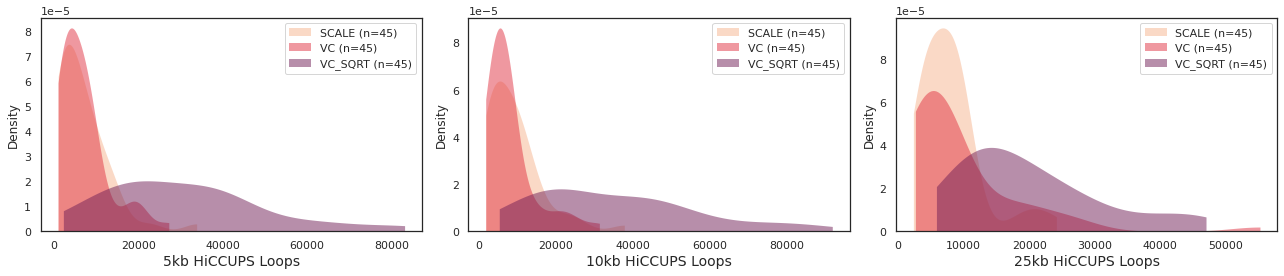

In [13]:
sns.set(style="white")
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
res = {0 : "5kb", 1 : "10kb", 2 : "25kb"}
colors = {"SCALE" : "#f6b48f", "VC" : "#e13342", "VC_SQRT" : "#701f57"}

hue_order = sorted(no_kr['norm'].unique())

for i in range(0, 3):
    for norm in hue_order:
        subset_data = no_kr[no_kr['norm'] == norm][["sample_name", "norm", res[i]]].loc[no_kr[res[i]] != -1]
        sns.kdeplot(ax=axes[i], data=subset_data, x=res[i], label=f'{norm} (n={len(subset_data)})',
                    color=colors[norm], fill=True, alpha=.5, linewidth=0, cut=0)
    axes[i].set_xlabel('{r} HiCCUPS Loops'.format(r=res[i]), fontsize=14)
    axes[i].legend(title=None)
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

fig.savefig("results/revisions/figures/hiccups_norm_numloops_nokr_09.06.24.png", dpi = 1000)

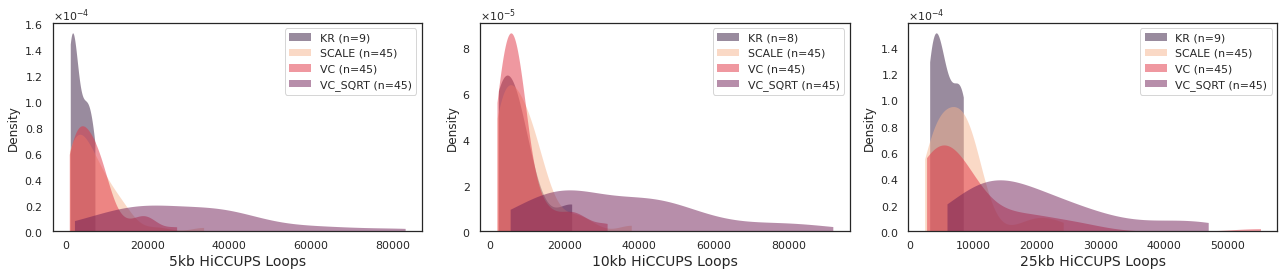

In [9]:
sns.set(style="white")
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
res = {0 : "5kb", 1 : "10kb", 2 : "25kb"}
colors = {"SCALE" : "#f6b48f", "VC" : "#e13342", "VC_SQRT" : "#701f57", "KR" : "#35193e"}

norm_counts = num_loops['norm'].value_counts().to_dict()
hue_order = sorted(num_loops['norm'].unique())

for i in range(0, 3):
    for norm in hue_order:
        subset_data = num_loops[num_loops['norm'] == norm][["sample_name", "norm", res[i]]].loc[num_loops[res[i]] != -1]
        sns.kdeplot(ax=axes[i], data=subset_data, x=res[i], label=f'{norm} (n={len(subset_data)})',
                    color=colors[norm], fill=True, alpha=.5, linewidth=0, cut=0)
    axes[i].set_xlabel('{r} HiCCUPS Loops'.format(r=res[i]), fontsize=14)
    axes[i].legend(title=None)
    
    axes[i].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    axes[i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
#fig.savefig("results/revisions/figures/hiccups_norm_numloops_09.06.24.png", dpi = 1000)

# Show the plot
plt.show()

In [10]:
no_kr

,sample_name,norm,5kb,mean_dist_5kb,10kb,mean_dist_10kb,25kb,mean_dist_25kb
1,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,SCALE,7126,159479,9575,221667,8496,348920
2,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC,4759,178649,7638,256026,8508,398845
3,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,VC_SQRT,18303,149501,18364,221730,11845,386062
5,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,SCALE,6425,381931,8062,616902,7866,1252320
6,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,10475,298682,7628,422216,4117,740740
7,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC_SQRT,59599,803707,77003,1176430,45876,1940721
9,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,SCALE,4044,283194,5512,480862,5838,992540
10,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC,8572,216679,6326,294940,3247,443994
11,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,VC_SQRT,42288,595461,56468,927473,36774,1679728
12,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,SCALE,22602,206762,26328,245017,17887,341448


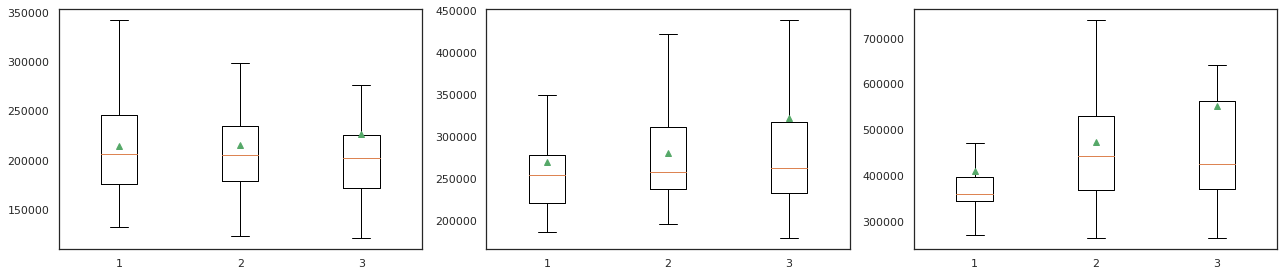

In [11]:
sns.set(style="white")
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
res = {0 : "5kb", 1 : "10kb", 2 : "25kb"}
colors = {"SCALE" : "#f6b48f", "VC" : "#e13342", "VC_SQRT" : "#701f57", "KR" : "#35193e"}

norm_counts = num_loops['norm'].value_counts().to_dict()
hue_order = sorted(num_loops['norm'].unique())

for i in range(0, 3):
    col = "mean_dist_" + res[i]
    data = no_kr[["sample_name", "norm", col]].pivot(index='sample_name', columns='norm', values=col).reset_index(drop=True)
    data = data.to_numpy()
    axes[i].boxplot(data, showmeans=True, showfliers = False)
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
#fig.savefig("results/revisions/figures/hiccups_norm_numloops_09.06.24.png", dpi = 1000)

# Show the plot
plt.show()

In [111]:
files = ["hg38.unmerged_qc_flags.fc.10_16_24.tsv", 
         "hg38.unmerged_qc_flags.fh.10_16_24.tsv", 
         "hg38.merged_qc_flags.fc.10_16_24.tsv",
         "hg38.merged_qc_flags.fh.10_16_24.tsv",
         "mm10.unmerged_qc_flags.fc.10_16_24.tsv",
         "mm10.unmerged_qc_flags.fh.10_16_24.tsv",
         "mm10.merged_qc_flags.fc.10_16_24.tsv",
         "mm10.merged_qc_flags.fh.10_16_24.tsv"]
writer = pd.ExcelWriter("results/tables/update_10.16.2024/xlsx/qc_flags.xlsx", engine = 'xlsxwriter')
for file in files:
    df = pd.read_csv("results/tables/update_10.16.2024/tsv/{f}".format(f = file), header = 0, sep = "\t")
    df.to_excel(writer, sheet_name = ".".join(file.split(".")[:3]))
writer.close()

In [112]:
df = pd.read_csv("results/tables/update_10.16.2024/tsv/mm10.unmerged_qc_flags.fh.10_16_24.tsv", header = 0, sep = "\t")
df.to_excel("results/tables/update_10.16.2024/xlsx/test.xlsx", sheet_name = ".".join(file.split(".")[:3]))

#### Overlaps

In [18]:
paths = glob.glob("results/revisions/hiccups/whole_genome/overlaps_09.09.24/*.b*")

In [19]:
data = []
for fn in paths:
    sample_data = []
    sample_name = fn.strip().split("/")[5]
    sample_data.append(sample_name)
    
    for res in ["5000", "10000", "25000"]:
        for typ in ["SCALE", "VC", "VC_SQRT", "SHARED"]:
            loops = fn + "/" + res + "_" + typ + ".bedpe"
            if os.path.exists(loops):
                loop_info = read_hiccups_loop_files(loops)
                sample_data.append(len(loop_info))
            else:
                sample_data.append(int(-1))
    
    data.append(sample_data)
df = pd.DataFrame(data)

In [20]:
df.columns = ["sample_name", "SCALE_5kb", "VC_5kb", "VC_SQRT_5kb", "SHARED_5kb", "SCALE_10kb", "VC_10kb", "VC_SQRT_10kb", "SHARED_10kb", "SCALE_25kb", "VC_25kb", "VC_SQRT_25kb", "SHARED_25kb"]
df = df.sort_values(by="sample_name").reset_index(drop=True)
df

,sample_name,SCALE_5kb,VC_5kb,VC_SQRT_5kb,SHARED_5kb,SCALE_10kb,VC_10kb,VC_SQRT_10kb,SHARED_10kb,SCALE_25kb,VC_25kb,VC_SQRT_25kb,SHARED_25kb
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,65,47,4624,3821,67,195,2566,5868,81,781,818,4848
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,71,32,7144,1461,53,17,9303,2163,63,81,4567,1797
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,55,32,6234,1006,37,20,8959,1599,52,72,5182,1418
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,90,36,5335,12949,67,55,3058,14478,85,104,929,8086
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,14,32,623,3966,27,14,628,5934,13,16,631,5050
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,135,56,4221,17784,112,116,2234,20377,113,197,735,11092
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,17,15,4211,4925,18,9,3799,7078,16,54,1348,5838
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,22,15,10753,791,29,16,8112,2110,53,360,1815,3447
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,6,2,9608,650,16,12,8038,1492,65,263,2477,2565
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,28,36,27611,448,29,26,27811,984,53,62,10960,1054


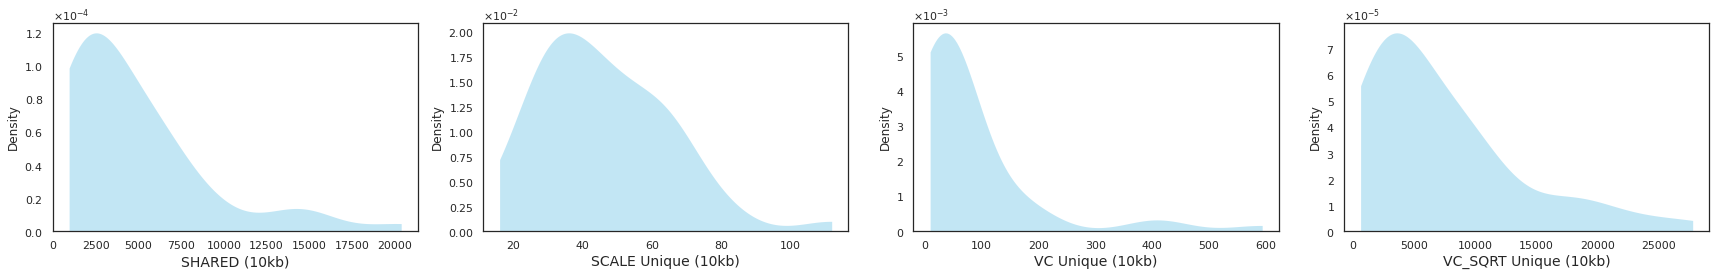

In [21]:
sns.set(style="white")
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

norms = ["SHARED", "SCALE", "VC", "VC_SQRT"]
subset_data = df.filter(regex='sample_name|10kb')

for i in range(0, 4):
    sns.kdeplot(ax=axes[i], data=subset_data, x=norms[i] + "_10kb", label=f'{norm} (n={len(subset_data)})',
                color="skyblue", fill=True, alpha=.5, linewidth=0, cut=0)
    axes[i].set_xlabel('{n} Unique (10kb)'.format(n=norms[i]) if "SHARED" not in norms[i] else '{n} (10kb)'.format(n=norms[i]), fontsize=14)
    
    axes[i].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    axes[i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

#fig.savefig("results/revisions/figures/hiccups_norm_numloops_overlap_09.11.24.png", dpi = 1000)